# 1. 객체 지향  프로그래밍
 ## (1) 객체란?
  
  ### 1) 객체
 Everything in Python is an object, and almost everything has attributes and methods.   
 
 파이썬에는 부울, 정수, 배열, 딕셔너리, 함수, 프로그램 등 모든 것이 객체이다. 파이썬에서 object라 불리는 것들은 모두 변수에 할당될 수 있고, 함수의 인자로 넘겨질 수 있는 것들이다. 그러므로 파이썬에 나오는 모든 것들은 object이다.
 
  ### 2) 변수
  `id()`함수를 이용해 객체의 identity를 확인해보자.   
  `id()` 함수는 파이썬 내장함수로, 프로그램이 돌아가는 동안 객체의 고유값(idendity)를 반환한다. 이는 메모리 주소 혹은 객체마다 부여된 유일한 고유값이다.
  
  ### 3) 얕은 복사, 깊은 복사
  **얕은 복사**: 원본 데이터는 그대로 두고, 참조하는 데이터의 id만을 복사하는 것. 원본 객체의 주소를 복사한다.   
  **깊은 복사**: 원본 객체의 값을 복사한다.   
  
  
 # 2. 클래스 기본 문법
  ## (1) 클래스 선언 및 인스턴스화
  객체를 직접 설계하기 위해서는 `class`키워드를 이용한다.
  ### 1) 클래스 선언
  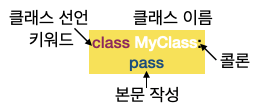
  

In [1]:
class Car:
    pass

class Car():
    pass

#id(Car)는 여러번 호출해도 같은 값이 얻어집니다. 
print(id(Car))
print(id(Car))

#id(Car())는 Car()가 호출될 때마다 다른 값이 얻어집니다. 
print(id(Car()))
print(id(Car()))

# 두 객체의 type을 살펴봅니다. 
print(type(Car))
print(type(Car()))

94105565323968
94105565323968
139862188733440
139862188733392
<class 'type'>
<class '__main__.Car'>


위 코드를 보면 `Car`라는 클래스 자체도 객체이고, `Car()`를 호출할 때마다 새로운 객체가 생성한다.
이는 둘다 id가 존재하기 때문이다.

하지만, `id(Car)`은 동일한 값을 가지지만
`id(Car())`는 호출될 때마다 다른 id값을 가진다.

`Car` 클래스는 `type`유형의 객체이다. `Car()`가 호출되면 `Car` 타입의 객체가 생성된다.

### 2) 클래스 사용 - 객체 인스턴스화
인스턴스화: 클래스를 객체로 만들어주는 작업
`Instance` : An individual object of a certain class.

In [2]:
mycar = Car()
mycar2 = Car()
print(id(mycar))
print(id(mycar2))

139862188735840
139862188736272


`mycar`변수에 `Car`클래스의 인스턴스를 할당한다.
인스턴스가 생성될 때마다 객체를 할당받은 변수들에게 다른 id가 부여되는 것을 확인할 수 있다.

### 3) 표기법
인스턴스 방법이 함수를 호출하는 문법과 비슷할 것이다.
이를 구분하는 방법은 PEP8 표기법에 따라 클래스명과 함수명을 다르게 표기한다.

#### 1) 클래스명 표기법: 카멜케이스
- 각 단어의 앞 글자를 대문자로 쓴다.
- mycar -> MyCar

#### 2) 함수명 표기법: 스네이크 케이스
- 단어는 소문자로 쓰고 각 단어의 연결은 언더바를 사용
- mycar -> my_car


## (2) 클래스 속성과 메서드
클래스에는 속성과 메서드가 있다.
- 속성: Class attributes are variables of a class that are shared between all of its instances.   

- 메서드: A class method is a method which is bound to the class and not the object of the class. It is represented by `def` keyword
   - the first method of class **should have `self` as a first argument**

Let's take a look

In [15]:
class Car:
    color = 'red'
    category = 'sports car'

    def drive(self):
        print("I'm driving")

    def accel(self, speed_up, current_speed=10):
        self.speed_up = speed_up
        self.current_speed = current_speed + speed_up
        print("speed up", self.speed_up, "driving at", self.current_speed)

### 메서드 호출(feat.인터프리터에서 벌어지는 일)

`mycar.drive()`코드는 인터프리터 내부에서는 `Car.drive(mycar)`로 동작한다. `self`라는 단어는 클래스를 인스턴스화 한 인스턴스 객체를 가리킨다.   

메서드를 호출할 때, 우리는 명시적으로 인자를 넣지 않지만 파이썬 내부적으로는 (= 파이선 인터프리터에서는) 인자 한 개를 사용하고 있고, 그 인자는 파이썬 클래스에 의해 선언된 객체 자신(`self`)이다.

In [16]:
mycar = Car()

mycar.drive()
Car.drive(mycar)

I'm driving
I'm driving


코드 구현을 도식적으로 표현하면 다음과 같다.

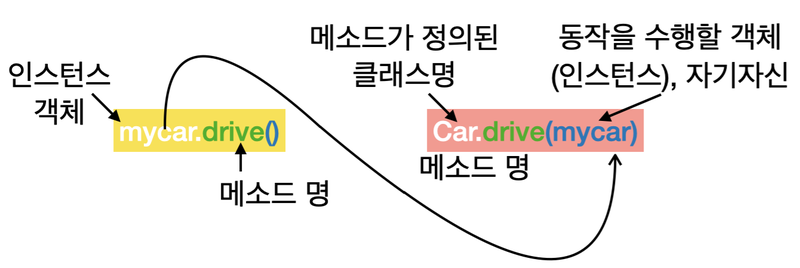

이런 구현을 `self`인자가 가능하게 해주는 것이다!

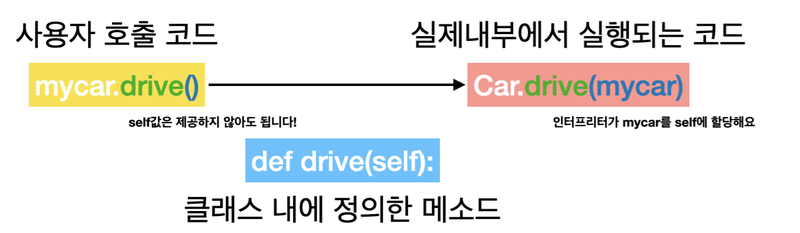

추가로, 클래스 메서드를 정의할 때 `self`인자를 사용하지 않으면 에러가 발생한다.


In [17]:
class Test:
    def run1(self):
        print("run1")

    def run2():
        print("run2")

t = Test()
t.run1()
t.run2()

run1


TypeError: run2() takes 0 positional arguments but 1 was given

### 접두사 self.

위와 같은 이유로, 속성으로 사용하고 싶은 변수는 `self.`를 써준다.`self`인자를 통해 선언된 객체의 값이라는 의미다.

객체 내에서 `self`를 사용하면 인스턴스 객체의 고유한 속성을 나타낼 수 있다. 클래스가 아닌 `self`, 즉 인스턴스화된 객체 자신의 속성을 의미한다.

참고로, 클래스 메서드 내부에서 `self.`가 없이 일반 변수처럼 선언된 변수는 메서드 내부에서만 작동한다.




In [18]:
class Test2:
    def run1(self, a):
        self.a = float(a) * 10
        print(self.a)

    def run2(self, b):
        b = float(b) + 10
        print(self.b)
        
t = Test2()
t.run1(1)
t.run2(1) #error

10.0


AttributeError: 'Test2' object has no attribute 'b'

## (3) 생성자
  ### 1) 생성자 `__init__`
  클래스에 의해 만든 인스턴스 객체의 속성값을 초기화시켜준다.   
  `던더(Double Under)이닛`이라고 발음한다
  
  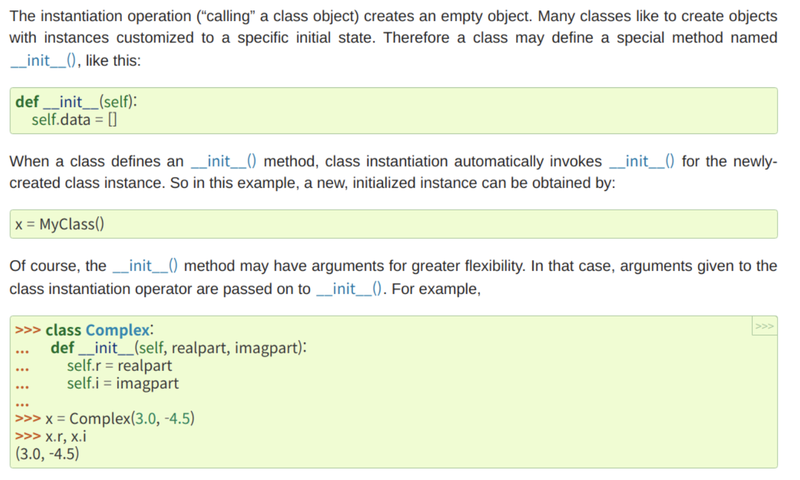

- init
  - `__init__` 메서드 안에 인자를 전달함으로써 인스턴스 객체의 속성을 초기화 할 수 있다.
  - `__init__`메서드 안에 정의된 변수는 클래스를 인스턴스화할 때 값을 지정할 수 있다.
  - 이를 인스턴스 객체의 초기화(initializing instance)라 하고, `__init__` 함수는 생성자(constructor)라고 한다.
  - `__init__`역시 `def` 키워드로 정의하며, self 인자를 넣어준다.

In [19]:
class Car2:
    def __init__(self, color, category):
        self.color = color
        self.category = category

    def drive(self):
        print("I'm driving")

    def accel(self, speed_up, current_speed=10):
        self.speed_up = speed_up
        self.current_speed = current_speed + self.speed_up
        print("speed up", self.speed_up, "driving at", self.current_speed)

In [20]:
#인스턴스 객체 선언
car1 = Car()
car2 = Car2('yellow', 'sedan')

In [21]:
car1.color, car2.color

('red', 'yellow')

In [22]:
car1.category, car2.category

('sports car', 'sedan')

### (4) 클래스 변수와 인스턴스 변수
이번엔 클래스 내 변수를 선언하는 2가지 방법을 알아보자.
1. 보통 변수와 동일하게 변수명을 쓰고 값을 할당하기
2. `__init__` 메서드 안에 `self.`와 함께 설정하기


In [31]:
class Car:
    Manufacture = "India"

    def __init__(self, color, category='sedan'):
        self.color = color
        self.category = category

위 코드에서 `Manufacture` 같은 변수를 `클래스 변수`라고 하고, 
`self.color`와 같은 변수를 `인스턴스 변수`라고 한다.

- 클래스 변수
  - 클래스에 의해 생성된 **모든 객체에서 같은 값을 조회**할 떄 사용
- 인스턴스 변수
  - `__init__()`. 안에서 `self`를 사용해 선언된 변수를 의미함
  - 클래스에 의해 생생된 객체들끼리 공유하지 않음

# 3. 클래스, 조금 더 알아보기 - 상속
 ### 1) 상속: 클래스만의 독특한 기능
 
 기존 클래스의 기능은 유지한 채 `maker`속성만 추가된 새로운 클래스 `NewCar`를 선언하고 싶다면, 클래스의 상속 기능을 이용하면 된다.
 
  

In [32]:
class Car:
    Manufacture = "India"

    def __init__(self, color='red', category='sedan'):
        self.color = color
        self.category = category

    def drive(self):
        print("I'm driving")

    def accel(self, speed_up, current_speed=10):
        self.speed_up = speed_up
        self.current_speed = current_speed + self.speed_up
        print("speed up", self.speed_up, "driving at", self.current_speed)

상속은 소괄호 안에 상속받을 클래스 이름을 적어주면 된다.

In [33]:
class NewCar(Car):
    pass

car = NewCar()
car.drive()
car.accel(10)

I'm driving
speed up 10 driving at 20


In [34]:
class NewCar(Car):
    maker = 'Porsche'

car = NewCar()
car.maker

'Porsche'

이렇게, 부모 클래스를 상속받은 뒤 원하는 속성을 추가해주면 된다.

 - 상속받은 클래스= 자식 클래스, sub class, derived class
 - 기존 클래스= 부모 클래스, super class, base class

### 2) 상속 사용하기
클래스를 잘 상속하기 위한 3가지 사용법을 살펴보자.
1. 메서드 추가하기(add)
2. 메서드 재정의하기(override)
3. 부모 메서드 호출하기(`super()`)


#### 메서드 추가하기
자식 클래스에 `새로운 메서드`를 추가할 수 있다.

In [35]:
class NewCar(Car):
    def fly(self):
        print("I'm flying!! This is the new car!!")

#### 메서드 오버라이드
자식 클래스의 `drive()` 메서드에 다른 문구가 출력되게 매서드를 정의해보자.
이렇게 기존에 있는 메서드를 변경하는 것은 `메서드 오버라이드(재정의)`라고 한다.

In [36]:
class NewCar(Car):
    def fly(self):
        print("I'm flying!! This is the new car!!")

    def drive(self):
        print("I'm driving and can fly")

#### 부모 메서드 호출하기 super()
`super()`는 파이썬 내장함수로, 자식 클래스에서 부모 클래스의 메서드를 호출하고 싶을 때 사용한다.

`super()`함수 문법

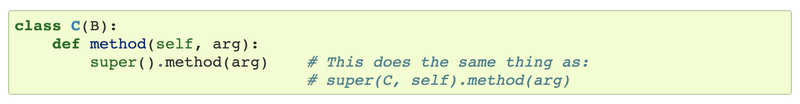

super()함수는 이렇게 사용한다.

```
def (부모클래스의)메서드이름():
	super().메서드이름()
```

자식 클래스는 부모 클래스의 메서드를 그대로 이어받을 수 있는데, **왜 굳이 메서드를 호출해야 할까? `super()`는 어떤 경우에 필요할까?**

아래 코드를 보고 어떤 경우에 필요한지 알아보자.

In [37]:
class NewCar(Car):
    def __init__(self, color, category, maker):
        super().__init__(color, category)
        self.maker = maker

    def fly(self):
        print("I'm flying!! This is the new car!!")

    def accel(self, speed_up, level=1, current_speed=10):
        self.boost[level] = {1 : 0, 2 : 30, 3 : 50}
        self.speed_up = speed_up + self.boost[level]
        self.current_speed = current_speed + self.speed_up
        print("speed up", self.speed_up, "driving at", self.current_speed)

Q. 그런데 왜 이렇게 정의하지 않았을까?
```
class NewCar(Car):
    def __init__(self, color, category, maker):
        self.color = color
        self.category = category
        self.maker = maker
```

A. 지금은 부모 클래스에서 `color` 를 이름으로 받지만 나중에 RGB값으로 받도록 바꾸고 싶다고 하자. 이때 만약 메서드를 위 코드와 같이 오버라이드 했다면 상속받은 클래스 하나하나의 초기화 코드를 변경해주어 한다.
이렇게 `super()`를 사용해 변수를 초기화하면 **부모 클래스만** 변경하면 된다!!

즉, __부모 클래스의 변경사항이 그대로 자식 클래스에 반영된다.__

In [38]:
class Car:
    Manufacture = "India"

    def __init__(self, color='red', category='sedan'):
        self.color = color 
        self.category = '2020Y '+ category


class NewCar(Car):
    def __init__(self, color, category, maker):
        super().__init__(color, category)
        self.maker = maker

newcar = NewCar('red','sports car', 'Kia')
print(newcar.category)

2020Y sports car


# 4. 전체 요약

1. 클래스 선언
2. 클래스 사용
3. 클래스는 동작과 상태를 갖는다.
 - 상태: 속성으로 표현, 일명 변수
 - 동작: 메서드로 표현, 일명 함수
 - ** 객체는 동작은 공유하지만 상태는 공유하지 않는다. **
4. 생성자 `__init__`
5. 클래스 변수와 인스턴스 변수
6. 상속
 - 메서드 추가, 오버라이드, 부모 메서드 호출하기(super)

# 5. n면체 주사위 만들기
 ## (1) 기획
 
 ### 1) 기능
 - 주사위의 면의 개수 n을 입력
 - 주사위를 던지면 1~n 눈의 수 중에서 랜덤으로 값을 출력한다.
 
 ## (2) 주 프로그램- main 함수
 
 1. 우선 입력이 있어야 한다.   
   - n이란 변수명에 주사위 면의 수를 입력받는다.
   - `get_inputs()`함수를 호출해서 받자
   - code: `n = get_inputs()`
 2. 주사위 객체를 만든다.
  - 주사위 객체는 FunnyDice 클래스에서 만들어진 인스턴스이다.(객체명은 mydice로 하자)
  - mydice를 FunnyDice의 클래스로부터 인스턴스 객체로 만든다.
  - 이 mydice 객체의 변수 n을 인자로 받고, 이 값은 객체의 속성으로 초기화 시키게 한다.
  - code: `mydice = FunnyDice(n)`
 
 3. 아래 함수는 main()함수이다.
 4. 추후에 mydice.throw(), mydice.getval() 등을 구현

In [107]:
def main():
    n = get_inputs()
    mydice = FunnyDice(n)
    mydice.throw()
    print("행운의 숫자는? {}".format(mydice.getval()))
        

 ## (3) FunnyDice 클래스

In [108]:
class FunnyDice:
    def __init__(self, n):
            self.n = n
    
    def throw(self):
        pass
    
    def getval(self):
        pass

    def setval(self, val):
        pass

## (4) 완성 전체 코드

In [111]:
# funnydice.py

from random import randrange

class FunnyDice:
    def __init__(self, n=6):
        self.n = n
        self.options = list(range(1, n+1))
        self.index = randrange(0, self.n)
        self.val = self.options[self.index]
    
    def throw(self):
        self.index = randrange(0, self.n)
        self.val = self.options[self.index]
    
    def getval(self):
        return self.val
    
    def setval(self, val):
        if val <= self.n:
            self.val = val
        else:
            msg = "주사위에 없는 숫자입니다. 주사위는 1 ~ {0}까지 있습니다. ".format(self.n)
            raise ValueError(msg)

def get_inputs():
    n = int(input("주사위 면의 개수를 입력하세요: "))
    return n

def main():
    n = get_inputs()
    mydice = FunnyDice(n)
    mydice.throw()
    print("행운의 숫자는? {0}".format(mydice.getval()))

if __name__ == '__main__':
    main()